<a href="https://colab.research.google.com/github/ezenio01YT/PRA3024-notebook/blob/main/exercise_part_0_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Track reconstruction
=================

For all the exercises in today's lab, we will be using a well-known pattern recognition problem that arises in particle physics experiments.

After particles leave traces in a detector, it is useful to find the trajectories that particles described as they passed through the detector. **Track reconstruction** consists in associating the fired hits (the *tracks*) in a detector that belong to each individual particle.

Track reconstruction yields interesting information about the particles, such as their trajectory, momenta and charge. Tracks are typically not reconstructed in one go however, but instead the problem is simplified into several parts that match geometrically to the conditions of the detector.

Let's see one example of tracking right away. From the image on the left with hits, we should separate the hits in *tracks* which represent particle trajectories, like the image on the right:

<img src="docs/example_track_reco.png" alt="Velopix reconstruction example" style="width: 600px;"/>

We will be looking at a specific track reconstruction problem: the one that occurs in the LHCb detector at CERN. Concretely, the [VELO pixel subdetector](https://lhcb-public.web.cern.ch/en/detector/VELO-en.html) consists of 52 modules, each of them with three silicon chips that detect particles as "pixels" in an array.

<img src="docs/velopix_front.png" alt="Velopix subdetector" />

Exercise 1
---------------

First, let's take some Monte Carlo simulated data to play with. This is a wider practice than what you may initially think: simulated data are used to develop and validate algorithms long before the detector hardware even exists. It can also help drive the decision of how the detector should be made!

In [1]:
# Run this only once
!git clone https://github.com/dcampora/velopix_tracking.git

Cloning into 'velopix_tracking'...
remote: Enumerating objects: 446, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 446 (delta 49), reused 47 (delta 47), pack-reused 393 (from 1)
Receiving objects: 100% (446/446), 7.46 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (215/215), done.


Alongside the project you just fetched are 10 events to play with. They are encoded in the json format, and the python library "json" knows just how to handle them:

In [2]:
import sys, os
sys.path.append(os.getcwd() + "/../")
sys.path.append(os.getcwd() + "/velopix_tracking/")

import json
from event_model import event_model as em

f = open("velopix_tracking/events/velo_event_0.json")
json_data = json.loads(f.read())
event = em.event(json_data)
f.close()

You now have loaded onto memory an `event`. An event is LHC jargon for a bunch crossing, a 25-nanosecond window where particles collided and stuff happened. Let's start by inspecting what we can do with this event.

* Find out what you can do with the `event`.

In [3]:
dir(event)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'description',
 'hits',
 'module_prefix_sum',
 'module_zs',
 'modules',
 'montecarlo',
 'number_of_hits',
 'number_of_modules']

As was said in the introduction, there should be 52 modules available.

* Find out what you can do with a module.
* Print modules 0, 2 and 4.

In [4]:
module = event.modules[0]
dir(module)
print(event.modules[0])
print(event.modules[2])
print(event.modules[4])

module 0:
 At z: {-288.08, -286.918}
 Number of hits: 20
 Hits (#id {x, y, z}): [#0 module 0 {9.18, -30.509, -288.08}, #1 module 0 {-9.137, -12.308, -288.08}, #2 module 0 {-8.806, -8.711, -288.08}, #3 module 0 {-9.623, -5.171, -288.08}, #4 module 0 {-21.73, -20.093, -286.918}, #5 module 0 {-16.422, -19.918, -286.918}, #6 module 0 {-12.455, -24.43, -286.918}, #7 module 0 {-11.832, -24.818, -286.918}, #8 module 0 {-7.827, -28.124, -286.918}, #9 module 0 {8.759, -44.478, -286.918}, #10 module 0 {-5.415, -22.407, -286.918}, #11 module 0 {-4.365, -34.152, -286.918}, #12 module 0 {-7.574, -37.711, -286.918}, #13 module 0 {-7.418, -37.75, -286.918}, #14 module 0 {-5.424, 6.221, -286.918}, #15 module 0 {-11.005, 11.49, -286.918}, #16 module 0 {-28.292, -8.771, -286.918}, #17 module 0 {-39.789, 6.663, -288.08}, #18 module 0 {-33.795, 2.468, -288.08}, #19 module 0 {-15.458, 15.438, -288.08}]
module 2:
 At z: {-263.08, -261.918}
 Number of hits: 21
 Hits (#id {x, y, z}): [#57 module 2 {8.499, -28

Each module has a number of hits, which represent the fired signals that were left by the (simulated) charged particles as they crossed them.

* Printing the module showed all the hits... but anyway, print all hits for module 0, this time iterating through the hits yourself.
* What are the minimum and maximum values of X, Y and Z of all hits in the module?

In [6]:
module0 = event.modules[0]

# Call the hits method to get the list
hits = module0.hits()

# Print all hits
for hit in hits:
    print(hit)

# Extract x, y, z
x_values = [hit.x for hit in hits]
y_values = [hit.y for hit in hits]
z_values = [hit.z for hit in hits]

# Compute min and max
x_min, x_max = min(x_values), max(x_values)
y_min, y_max = min(y_values), max(y_values)
z_min, z_max = min(z_values), max(z_values)

print("X: min =", x_min, ", max =", x_max)
print("Y: min =", y_min, ", max =", y_max)
print("Z: min =", z_min, ", max =", z_max)



#0 module 0 {9.18, -30.509, -288.08}
#1 module 0 {-9.137, -12.308, -288.08}
#2 module 0 {-8.806, -8.711, -288.08}
#3 module 0 {-9.623, -5.171, -288.08}
#4 module 0 {-21.73, -20.093, -286.918}
#5 module 0 {-16.422, -19.918, -286.918}
#6 module 0 {-12.455, -24.43, -286.918}
#7 module 0 {-11.832, -24.818, -286.918}
#8 module 0 {-7.827, -28.124, -286.918}
#9 module 0 {8.759, -44.478, -286.918}
#10 module 0 {-5.415, -22.407, -286.918}
#11 module 0 {-4.365, -34.152, -286.918}
#12 module 0 {-7.574, -37.711, -286.918}
#13 module 0 {-7.418, -37.75, -286.918}
#14 module 0 {-5.424, 6.221, -286.918}
#15 module 0 {-11.005, 11.49, -286.918}
#16 module 0 {-28.292, -8.771, -286.918}
#17 module 0 {-39.789, 6.663, -288.08}
#18 module 0 {-33.795, 2.468, -288.08}
#19 module 0 {-15.458, 15.438, -288.08}
X: min = -39.789 , max = 9.18
Y: min = -44.478 , max = 15.438
Z: min = -288.08 , max = -286.918


Exercise 2
---------------

Let's start by visualizing the event that you were inspecting all along.

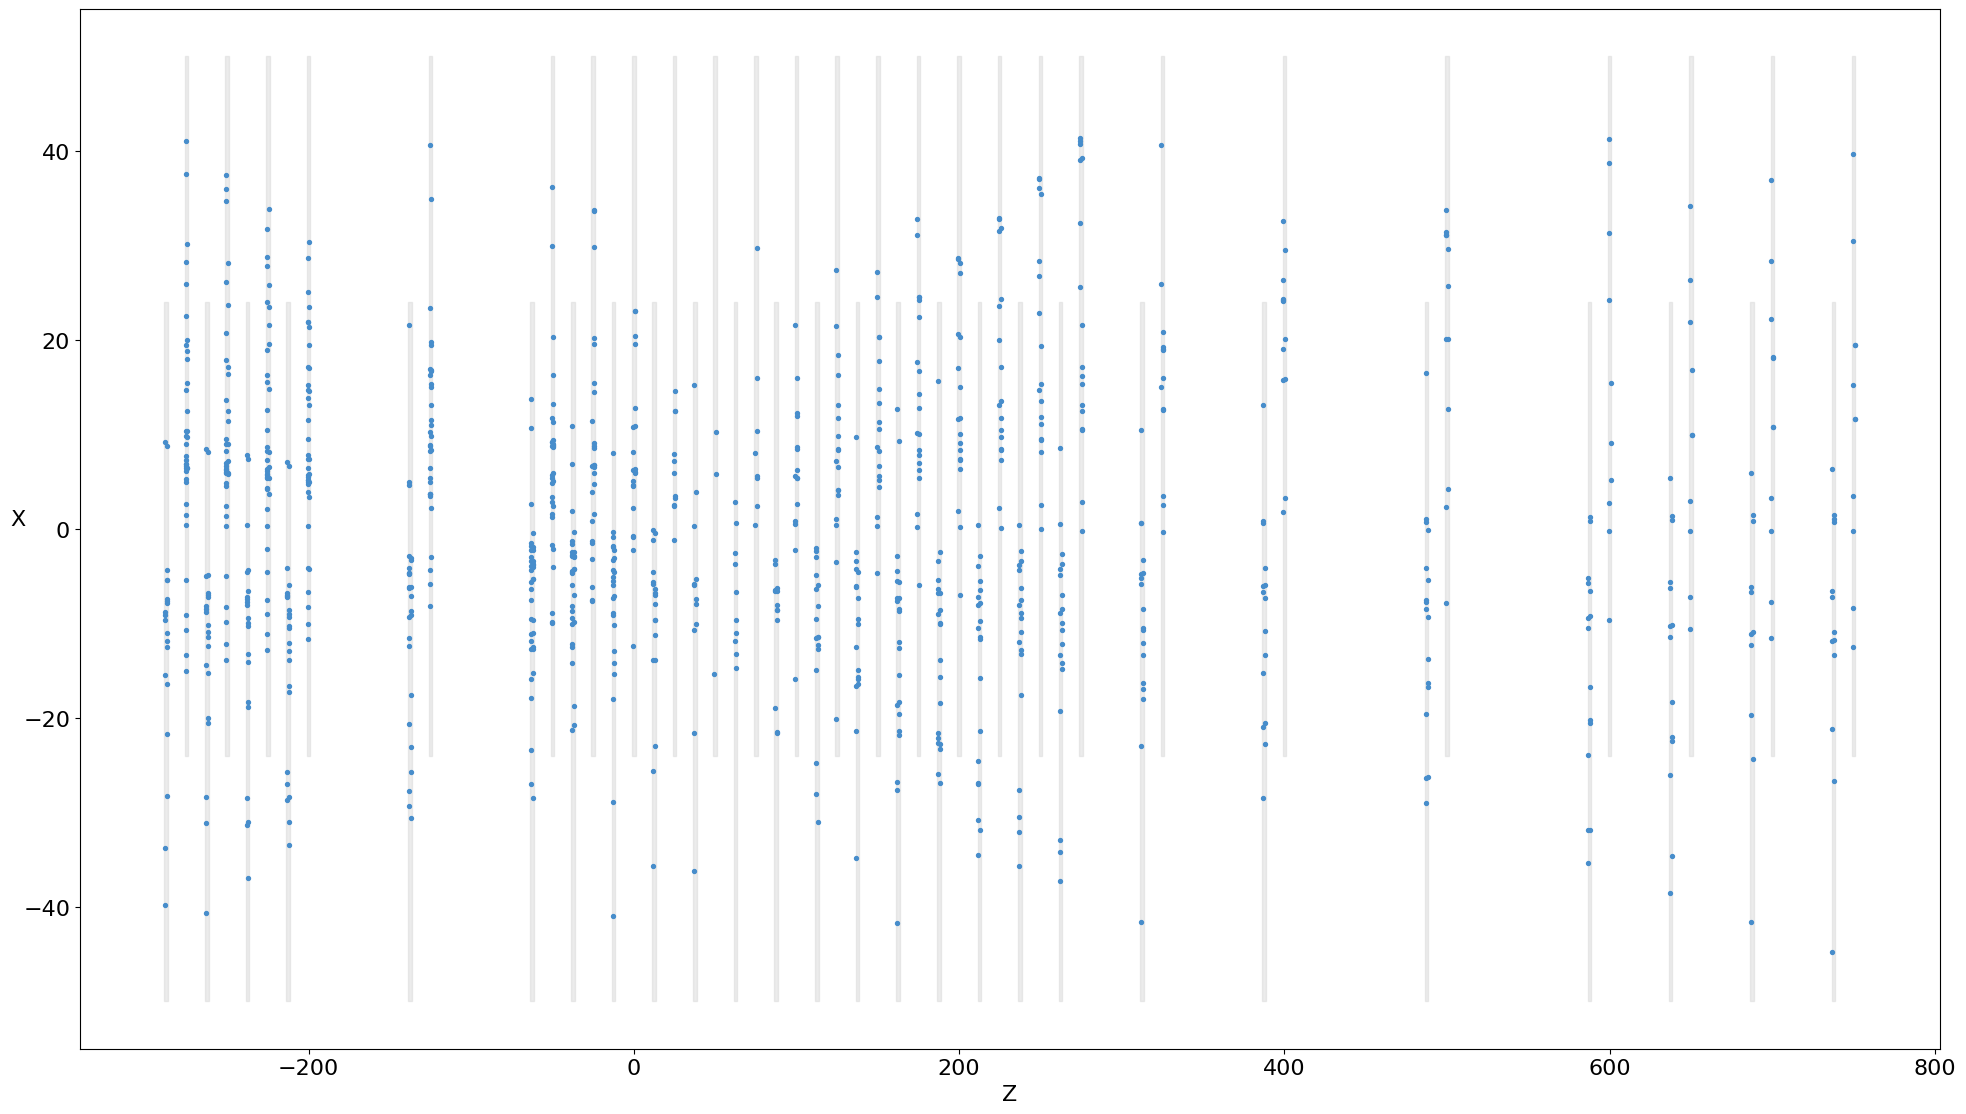

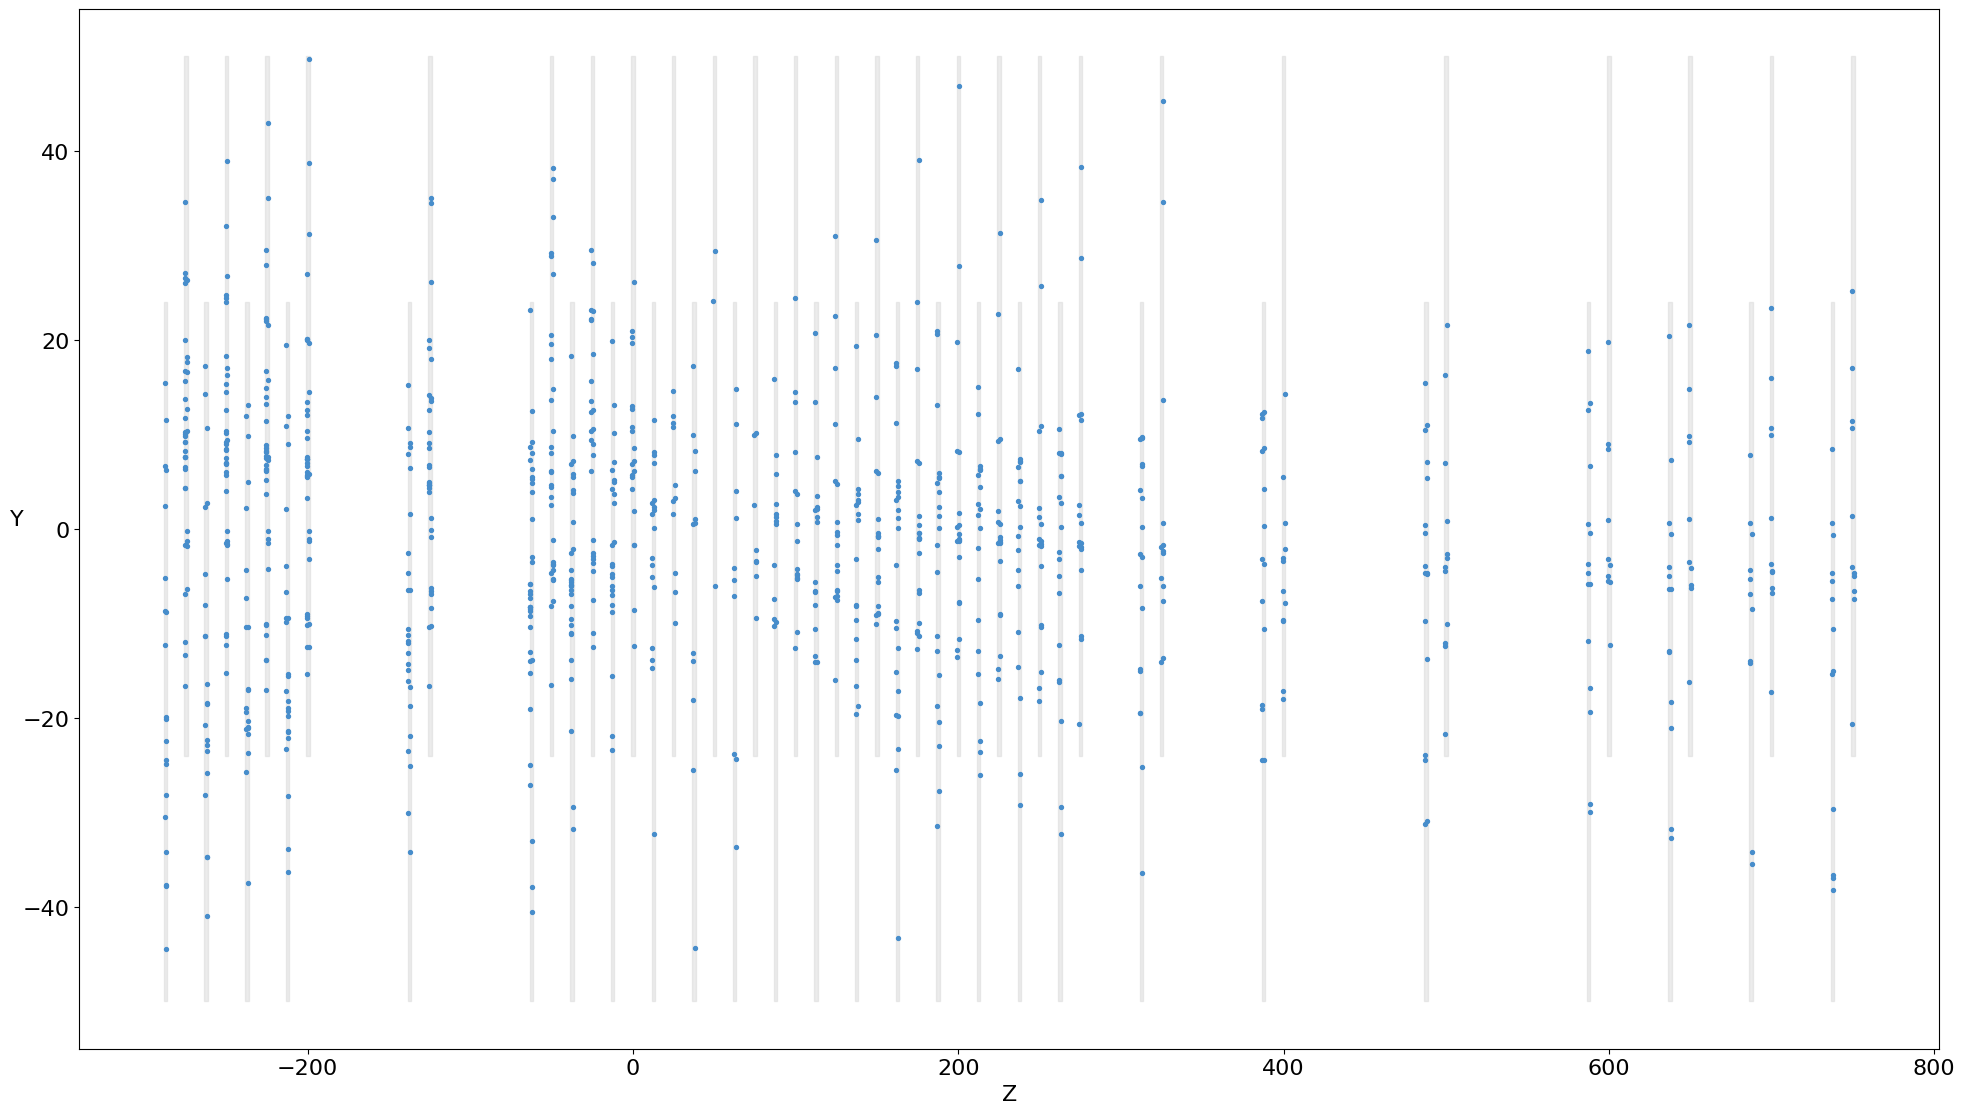

In [7]:
from visual.base import print_event_2d
%matplotlib inline

print_event_2d(event)
print_event_2d(event, y=1)

You may use the `print_event_2d` to... wait, you can do this too:

* Use the function `help` to find out what you can do with the `print_event_2d` function.
* Print only modules `0, 2, 4` of the event.

Help on function print_event_2d in module visual.base:

print_event_2d(event, tracks=[], x=2, y=0, track_color=0, filename='visual.png', save_to_file=False, modules=[])
    A function to print events. It produces a 2D plot
    and either prints or saves it to a file.

    Arguments
    ---------

    event : the event to be printed
    modules : list of modules to be printed
    tracks : tracks to print
    track_color : color of tracks (in 0-20 range)
    x : index to be used as x axis
    y : index to be used as y axis
    save_to_file : switches between saving output to file or showing it (default)
    filename : file where to save visualization



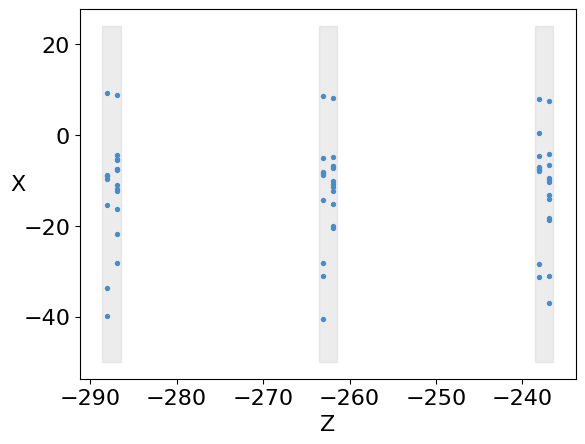

In [8]:
from visual.base import print_event_2d

help(print_event_2d)
print_event_2d(event, modules=[0, 2, 4])

You can now create some tracks. In this simplistic python *event model* the type `em.track` expects a list of hits. A track is simply a list of hits.

* Create some `track`s with hits from modules `0, 2, 4`. A track should typically contain at least three hits, and not contain any hits from the same module.
* Visualize modules `0, 2, 4` with the tracks you have created.
* How many tracks could you create with hits from these modules?
* How many tracks with no overlapping hits could you create with hits from these modules?

In [10]:
from event_model import event_model as em

# Get hits from each module
hits0 = event.modules[0].hits()
hits2 = event.modules[2].hits()
hits4 = event.modules[4].hits()

# Create tracks: pick one hit from each module
tracks = []
for h0 in hits0:
    for h2 in hits2:
        for h4 in hits4:
            track = em.track([h0, h2, h4])
            tracks.append(track)

print(f"Total tracks created: {len(tracks)}")

Total tracks created: 8820


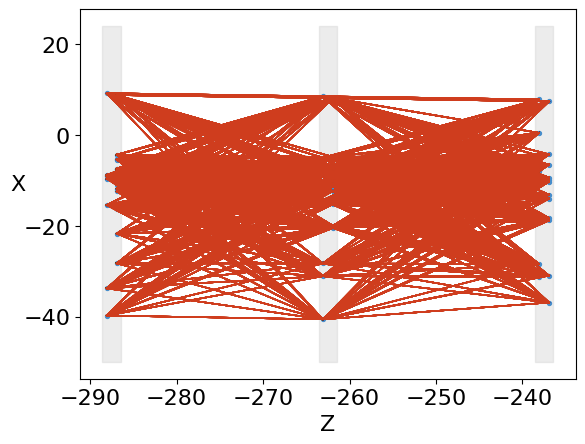

In [11]:
print_event_2d(event, modules=[0, 2, 4], tracks=tracks)

In [28]:
import math

# Number of hits in each module
hits0 = 20  # module 0
hits2 = 21  # module 2
hits4 = 21  # module 4

# Step 1: Choose 20 hits from module 2 out of 21
choose_2 = math.comb(hits2, hits0)  # 21 choose 20
print(f"Step 1: Choose 20 hits from module 2 out of 21:")
print(f"  math.comb(21, 20) = {choose_2}")  # 21

# Step 2: Permute these 20 hits to assign to module 0 hits
perm_2 = math.factorial(hits0)  # 20!
print(f"Step 2: Permute the 20 chosen hits for module 2:")
print(f"  20! = {perm_2}")  # 2432902008176640000

# Step 3: Choose 20 hits from module 4 out of 21
choose_4 = math.comb(hits4, hits0)
print(f"Step 3: Choose 20 hits from module 4 out of 21:")
print(f"  math.comb(21, 20) = {choose_4}")  # 21

# Step 4: Permute these 20 hits to assign to module 0 hits
perm_4 = math.factorial(hits0)
print(f"Step 4: Permute the 20 chosen hits for module 4:")
print(f"  20! = {perm_4}")  # 2432902008176640000

# Step 5: Multiply everything together
total_ways = choose_2 * perm_2 * choose_4 * perm_4
print(f"Step 5: Multiply all steps to get total non-overlapping tracks:")
print(f"  {choose_2} * {perm_2} * {choose_4} * {perm_4} = {total_ways}")
print(f"Step 5 (scientific notation) ≈ {total_ways:.3e}")



Step 1: Choose 20 hits from module 2 out of 21:
  math.comb(21, 20) = 21
Step 2: Permute the 20 chosen hits for module 2:
  20! = 2432902008176640000
Step 3: Choose 20 hits from module 4 out of 21:
  math.comb(21, 20) = 21
Step 4: Permute the 20 chosen hits for module 4:
  20! = 2432902008176640000
Step 5: Multiply all steps to get total non-overlapping tracks:
  21 * 2432902008176640000 * 21 * 2432902008176640000 = 2610284371992958109269091785113600000000
Step 5 (scientific notation) ≈ 2.610e+39


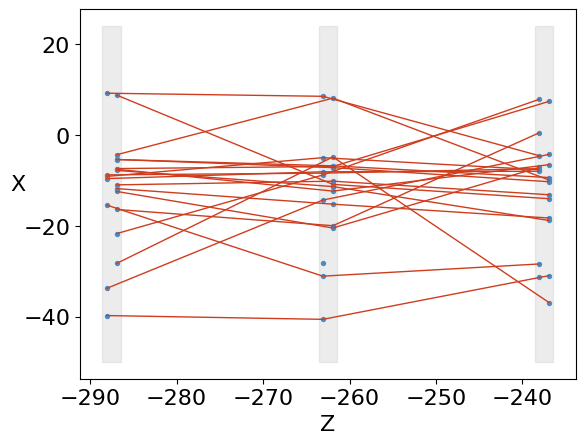

In [25]:
from event_model import event_model as em

# Get hits from the modules
hits0 = event.modules[0].hits()
hits2 = event.modules[2].hits()
hits4 = event.modules[4].hits()

# Limit to the number of hits in the smallest module
n_tracks = min(len(hits0), len(hits2), len(hits4))  # 20

# Create non-overlapping tracks
non_overlapping_tracks = [
    em.track([hits0[i], hits2[i], hits4[i]]) for i in range(n_tracks)
]

# Visualize modules 0, 2, 4 with these tracks
from visual.base import print_event_2d

print_event_2d(event, modules=[0, 2, 4], tracks=non_overlapping_tracks)


In [29]:
# Number of hits in each module
hits0 = len(event.modules[0].hits())
hits2 = len(event.modules[2].hits())
hits4 = len(event.modules[4].hits())

# Maximum number of non-overlapping tracks
max_tracks = min(hits0, hits2, hits4)
print("Maximum number of non-overlapping tracks:", max_tracks)


Maximum number of non-overlapping tracks: 20
